In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import json

from smart_open import smart_open
%matplotlib inline
import itertools
import numpy as np
from nltk.tokenize import RegexpTokenizer

In [184]:
def read_data():
    with smart_open('./data/dataset.jsonl.gz') as fh:
        dataset = [
            json.loads(line.decode('utf-8'))
            for line in fh
        ]
    return pd.DataFrame(dataset)

In [185]:
def fill_na(df):
    df['BRAND'] = df['BRAND'].fillna(df['NAME'].str.split(' ').str[0])
    df['BRAND'] = df['BRAND'].str.lower()
    df['SHOP'] = df['SHOP'].str.lower()
    df['BRAND'] = df['BRAND'].replace("levi's",'levis')
    return df

In [407]:
def drop_unusefull(df):
    df = df.drop(columns=['DISPLAY_URL','CONTENTS'])
    return df

In [408]:
df = read_data().pipe(fill_na).pipe(drop_unusefull)

In [227]:
df.head()

,BRAND,DALTIX_ID,DESCRIPTION,NAME,PRODUCT_ID,SHOP
0,kärcher,43823f3f6826dcfd1f14b5898d742a1ead54937001f980...,De velgenreiniger 'Car & Bike' van Kärcher is ...,"Kärcher velgenreiniger 'Car & Bike' 0,5 L",5305104,planit
1,levis,2258f16fa7ff7aab35c4534ac645017637d072f2fee9cc...,De matte muurverf Originals potloodgrijs van L...,"Muurverf Originals mat 2,5l potloodgrijs",9200000095428359,bol
2,rapid,69ec8d4f776200897422a4b8f93d3416a36781fe110d75...,Vlakdraad nieten. Oorspronkelijk ontworpen voo...,Rapid Nieten - No 970 - 8 mm,9200000010411327,bol
3,differnz,f03ef881a1d1934c62b9db6b4403a59ae34de96148f362...,Toiletmeubel Fabulous 40 is een van de meest v...,Differnz Fabulous Fonteinmeubel - 40 cm - Wit,9200000051330319,bol
4,pickup,aaff0aa6db24814ad25d5cb410ded08361ab32bcb953e1...,"Pickup pictogram is zelfklevend, weerbestendig...","Pickup pictogram P621 ""Heren""",1409779,planit


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from nltk.tokenize import RegexpTokenizer

from stop_words import get_stop_words
stop_words = get_stop_words('dutch')

In [362]:
df_text = df.NAME

vectorizer = TfidfVectorizer(stop_words=stop_words,max_df=0.8,min_df=2)
df_text_vec = vectorizer.fit_transform(df_text)

In [15]:
pairs = pd.read_csv('firstsubmission.csv')

In [361]:
df = df[ ~((df.DALTIX_ID.isin(pairs.daltix_id_1) ) |  (df.DALTIX_ID.isin(pairs.daltix_id_2) ))]

In [34]:
list(pairs.daltix_id_1)

['f8b4a3f667a7dda2847fc0e8248e45cb24c4122a7d638fdcafd2a3a4ded006d4',
 '3f20d83ac16ca442e6c6c57d1628529e5c6662366ab15f3791dc75504586f652',
 'ddbe76b67d3eee4877ada98a23d529c98c2f296d28f55dab45562fcc5e2f3f25',
 'ca0872c76df797461e8bc2ab2700e7d0a6bf9445e71ffbca167ad7794c2c2454',
 'dbe5073c0626c5efa9fd918ebe9bb896f3b412540e3774cbe1b16a0fa9319f1e',
 'b2f73d8eab8a2804ecd551f98a4b61a8e77127028e8d765f582e32b57e35bfda',
 'a0f86cb03bd6953b3d3bfde12e88d1b15d3618d68c0cb9350503399b86e78e19',
 'd9fb4142246841dac0aaa8bf8db22d34d715e2c12bb4b76998584556c732417e',
 'd3fe94d1d213fa1d2e440edd1a6e5021d31180e2adb0057cbde1c7dfcc11f363',
 '62ddbee1b3384aed71657475421145645dd20a7393906102a70871687bc1b192',
 'bd81949880dfd3b04635f66dc3c83e4cce160f36c14242f7e47cc2d27cfe7bd6',
 'b2cf1fd3434425f71f8afa68ce1c47ce8a059ab2cb018453bd348db70e6ae02a',
 '922f3db8caecf9831e4c926beee6c0dbae30a02a0eda854a807585f2996078cd',
 '081d72c8bb3239be0c2b9e16482299c661bef0417e8d5463bcb68c0cec2c1629',
 'b14606d17b9d593b428c13caafd06a88

In [35]:
len(set(list(pairs.daltix_id_1) + list(pairs.daltix_id_2)))

54426

In [39]:
similarity = df_text_vec * df_text_vec.T

KeyboardInterrupt: 

In [40]:
a = np.argsort(similarity.toarray())

In [41]:
a[0,-2]

6691

In [389]:
df_5 = pd.DataFrame({'id_1':range(0,similarity.shape[0]), 'id_2': a[:,-2]})

In [390]:
df_5['dist'] = df_5.apply(lambda x: similarity[x['id_1'],x['id_2']] ,axis=1)
df_5['daltix_id_1'] = df_5.id_1.apply( lambda x: df.iloc[x]['DALTIX_ID'])
df_5['daltix_id_2'] = df_5.id_2.apply( lambda x: df.iloc[x]['DALTIX_ID'])
df_5['brand_id_1'] = df_5.id_1.apply( lambda x: df.iloc[x]['BRAND'])
df_5['brand_id_2'] = df_5.id_2.apply( lambda x: df.iloc[x]['BRAND'])
df_5['name_id_1'] = df_5.id_1.apply( lambda x: df.iloc[x]['NAME'])
df_5['name_id_2'] = df_5.id_2.apply( lambda x: df.iloc[x]['NAME'])
df_5['store_id_1'] = df_5.id_1.apply( lambda x: df.iloc[x]['SHOP'])
df_5['store_id_2'] = df_5.id_2.apply( lambda x: df.iloc[x]['SHOP'])
df_5['digits_id_1'] = df_5.name_id_1.apply(func)
df_5['digits_id_2'] = df_5.name_id_2.apply(func)

In [391]:
df_5 = df_5[df_5.dist > 0.60]

In [382]:
df_5 = df_5[(df_5.brand_id_1 == df_5.brand_id_2) & (df_5['store_id_1'] != df_5['store_id_2'])]

In [383]:
len(df_5)

3650

In [384]:
df_5 = df_5[(df_5.digits_id_1 == df_5.digits_id_2) | (len(df_5.digits_id_1) == 0) | (len(df_5.digits_id_2) == 0)]

In [385]:
len(df_5)

3650

In [277]:
sub2neighours = pd.concat([pd.read_csv('name_dist_0_7.csv')[['daltix_id_1','daltix_id_2']],df_5[['daltix_id_1','daltix_id_2']],pairs])

In [279]:
sub2neighours.to_csv('sub17.csv',index=False)

In [387]:
subseven = pd.concat([pairs,df_5[['daltix_id_1','daltix_id_2']]])

In [388]:
subseven.to_csv('sub_number_low_threshold_2.csv',index=False)

In [74]:
def get_vetor(daltix_id):
    return df_text_vec[df.loc[daltix_id]['index']].values

In [85]:
def compute_dist(row):
    print(row['daltix_id_1']+ '---')
    print(row['daltix_id_2'])
    return get_vetor(row['daltix_id_1']) * get_vetor(row['daltix_id_2']).T

In [88]:
pairs['dist'] = get_vetor(pairs.daltix_id_1) * get_vetor(pairs.daltix_id_2)

AttributeError: values not found

In [117]:
l = []
for value in list(pairs.daltix_id_1):
    l.append(df.loc[value]['index'])

In [123]:
l2 = []
for value in list(pairs.daltix_id_2):
    l2.append(df.loc[value]['index'])

In [124]:
a = df_text_vec[l,:]

In [125]:
b = df_text_vec[l2,:]

daltix_id_1    0
daltix_id_2    0
dtype: int64

In [146]:
pairs['dist'] = np.diag(c.toarray())

In [144]:
c = a*b.T

In [158]:
second_sub = pairs[pairs['dist']>0.9]

In [137]:
a.shape

(27213, 24007)

In [138]:
b.shape

(27213, 24007)

In [43]:
import pandas as pd
import dask.dataframe as dd
from dask.multiprocessing import get


In [111]:
df = df.reset_index().set_index('DALTIX_ID',drop=False)

In [66]:
df.loc['43823f3f6826dcfd1f14b5898d742a1ead54937001f9800d6a115e86c9381b98']['index']

0

In [152]:
second_sub = second_sub.drop(columns=['dist'])

In [153]:
second_sub.to_csv('secondsub.csv',index=False)

In [155]:
!head secondsub.csv

daltix_id_1,daltix_id_2
ca0872c76df797461e8bc2ab2700e7d0a6bf9445e71ffbca167ad7794c2c2454,433f3feeca98c51230e0c9db353ec66166cb21f7e6b16523c36141b93480446c
dbe5073c0626c5efa9fd918ebe9bb896f3b412540e3774cbe1b16a0fa9319f1e,3546c54435b2c5fb2520187b1934c441c3b380789e4b80e88b3055d4f067f79e
b2cf1fd3434425f71f8afa68ce1c47ce8a059ab2cb018453bd348db70e6ae02a,fe9e0f41acd55192fea1e925dbf011c6558335327c997f8c6880b09437aebca1
922f3db8caecf9831e4c926beee6c0dbae30a02a0eda854a807585f2996078cd,eff9194e31f86434ca14b5610f3b635b48db0f1fe195a5e44140194a63f521ee
081d72c8bb3239be0c2b9e16482299c661bef0417e8d5463bcb68c0cec2c1629,8a543eb73b5b28095ff15263cdec9da0b62ff8d7f3df6ae6183e3ae863eeec3a
49c34afe773984c101c516fc3534a112bdfd3ac1b1298c5a86cb6418a8fc4402,032526fafab05f870127796c7780777c70033771f325dab5e745cb3a7df606e4
4a23641d937fe8560e6f08e9df76e588d26ef8c0d7c4fb480ff4e6d9106a208d,3eb010a31304f06aec59ea915c2dc8f7da6cfa78f6a47bba660aaee1266487d5
ffe170f7efd7dd134886fd2bdac9ca801d5d756eb89a6513c77b95afb62f831c,9

In [157]:
pairs.sample()

,daltix_id_1,daltix_id_2,dist
10093,9806379a31223ed8eb82f4919692b5f1b14ef7ead2efae...,cfc5ff964dea56d0d8f7b274db8634ac3eeebd52e19fb7...,0.759113


In [160]:
thirth_sub = pairs[pairs['dist']>0.5]

In [161]:
len(thirth_sub)

25124

In [164]:
thirth_sub.drop(columns='dist').to_csv('3sub.csv',index=False)

In [163]:
len(pairs)

27213

In [168]:
fourth_sub = pairs[pairs['dist']>0.3]

In [167]:
fourth_sub.drop(columns='dist').to_csv('4sub.csv',index=False)

In [173]:
fifth_sub = pairs[pairs['dist']>0.1]

In [171]:
len(fifth_sub)

27114

In [172]:
len(pairs)

27213

In [174]:
fifth_sub.drop(columns='dist').to_csv('5sub.csv',index=False)

In [15]:
sim = df_text_vec * df_text_vec.T

In [185]:
df.loc[pairs.iloc[0].daltix_id_1]

index                                                       6561
BRAND                                                    Martens
DALTIX_ID      f8b4a3f667a7dda2847fc0e8248e45cb24c4122a7d638f...
DESCRIPTION    De bocht van Martens zorgt voor een verbinding...
NAME           Martens lijmbocht 'MV - 45 graden' PVC diam 80 mm
PRODUCT_ID                                               0023739
SHOP                                                      planit
Name: f8b4a3f667a7dda2847fc0e8248e45cb24c4122a7d638fdcafd2a3a4ded006d4, dtype: object

In [186]:
df.loc[pairs.iloc[0].daltix_id_2]

index                                                      64663
BRAND                                                    Martens
DALTIX_ID      ca0b1b03a31ab47262bf68f6cec18f00e9a3e6491a81c2...
DESCRIPTION    De bocht zorgt voor een verbinding onder een b...
NAME                      Martens HWA bocht 80mm 45gr 1xlm groen
PRODUCT_ID                                               0023739
SHOP                                                      praxis
Name: ca0b1b03a31ab47262bf68f6cec18f00e9a3e6491a81c29a258f7d6fc867b4d2, dtype: object

In [187]:
sim[64663,6561]

0.08440858469123011

In [1]:
sim2 = np.argpartition(sim.toarray(),4)

NameError: name 'np' is not defined

In [35]:
sim2.shape

(10000, 101781)

In [56]:
df_3 = pd.DataFrame({'daltix_id_1':[i for i in range(20000,30000)],'daltix_id_2':sim2[:,1]})

In [57]:
df_3['dist'] = df_3.apply(lambda x: sim[x['daltix_id_1'],x['daltix_id_2']],axis=1)

In [58]:
df_3.dist.max()

0.0

In [53]:
df_3[df_3.dist > 0.2]

,daltix_id_1,daltix_id_2,dist
470,470,67589,0.253519
655,655,67247,0.239050
1048,1048,67589,0.252187
1111,1111,66862,0.351524
1124,1124,67640,0.227198
1453,1453,64998,0.240582
1553,1553,63161,0.237235
1678,1678,64476,0.255316
1811,1811,67681,0.239073
1960,1960,65498,0.232538


In [54]:
newpairs = pd.concat([df_3,new_pairs])

In [174]:
df_5.to_csv('name_dist_0_7.csv',index=False)

In [175]:
df_5.head()

,id_1,id_2,dist,daltix_id_1,daltix_id_2,brand_id_1,brand_id_2,name_id_1,name_id_2,store_id_1,store_id_2
2,2,12582,0.843365,c94e4ac248e0075076dda8ea417be7b770dd91a58abe4b...,161afaf5732423c54d2977e34f901aeff65c871b2bfe9b...,commandant,commandant,Commandant Rubbing Compound nr. 3 - 500gr.,Commandant onderhoud nr 3 rubbing compound,bol,praxis
8,8,1611,0.751907,13b9e6d4e5fc32bd8f21da4aa79184fcfada46cbbf0ad5...,6de25b17b4f0829a24e87f3f3fb28d7c9d888446147085...,bosch,bosch,Bosch AHS 70-34 elektrische heggenschaar 700W ...,BOSCH Heggenschaar AHS 70-34,hubo,hornbach
19,19,26319,1.000000,d498db37f6a475efe9b83a84d8302a1082cdf5dec6482a...,b2874501a25de791d0b6d62856614ae76aa67265382c29...,eurom,eurom,EUROM Terrasverwarmer TH1800S,Eurom terrasverwarmer th1800s,hornbach,praxis
46,46,41447,0.771179,b947ac931180510a09cce2eeae73544bab35208d39b986...,6af92cbe4f77a4922b2008ed959ab7473b83c4159b2a9f...,brabantia,brabantia,Brabantia vuilniszak 50 L 10 stuks,Brabantia vuilniszak 15 L - 20 stuks,praxis,planit
49,49,40213,0.807126,9c667b5732967d55ee159649187ab8461b3dcd69d75f77...,754a38c10ffddbfd155e6110d24d404f41569c271a8871...,stanley,stanley,Stanley reservemesjes lang 5 stuks,Stanley Reservemesjes 5 stuks,praxis,hubo


In [176]:
df.BRAND.unique()

array(['kärcher', "levi's", 'commandant', ..., 'waterdichte',
       'stekkersafe', 'graphique de france'], dtype=object)

In [216]:
df_5

,id_1,id_2,dist,daltix_id_1,daltix_id_2,brand_id_1,brand_id_2,name_id_1,name_id_2,store_id_1,store_id_2
583,583,2679,0.835443,0bd0a8d73ac2d86172686fc6d51777edd4a4483cc4b8a3...,443583eb3eff6f854699f559fd36f158c10927800f63f2...,verhaert,verhaert,Verhaert glasblok 'Brilly' turquoise,Verhaert glasblok 'Brilly' rood,planit,planit


,id_1,id_2,dist,daltix_id_1,daltix_id_2,brand_id_1,brand_id_2,name_id_1,name_id_2,store_id_1,store_id_2
28999,28999,37783,0.857452,f53e12e4c96aba2d99ba7ea309bcad43efd45b7d6ac762...,1f814e08af80a7ec1193428a06b5d0890c02a0ea2fda22...,bosch,bosch,Bosch extra sterke draad voor ART 23 Combitrim,ART 23 Combitrim Trimmer Extra Sterke Draad (1...,hornbach,bol
12205,12205,13941,0.856200,e960b48f416c0ea4f9d05b861c4daba9333a2d870f5a33...,3bfc89191814b770f7706dd1f217b08a9b5e9b09013241...,rubson,rubson,Rubson Pistool voor PU-schuim,Rubson 'PU'-pistool,hubo,planit
44297,44297,20812,1.000000,78c17db4421c7803552094d2257e74c504f6ae7a2bed37...,0e77f2bfcc2e2d90cba02d28853839bcbc0132e086a192...,eurom,eurom,Eurom convector ‘Safe-T-Convect’ 2200W,Eurom Convector Safe-T-Convect 2200W,planit,hubo
27551,27551,15716,0.858782,1545adcf702f66109d600d6d429c7a11ebb9c89107e1c2...,16539e72f4e094742b6c3c1fbada995bd31028098ea5de...,pickup,pickup,Pickup Bord verboden te roken 23x33 cm,PickUp bord 'Verboden te roken',hubo,planit
35805,35805,1625,0.748650,9375e5c8f9e40a4166cd01d4c5b09219479b2653c7e407...,51223160df6b181a394463c2cd884d9ff3ddc1c016db15...,niko,niko,Niko Inbouwkader Hydro,Niko spatwaterdicht inbouwkader voor hydro-sch...,hubo,planit
7169,7169,31390,0.707453,e4fb7532aca4f4e5ed87c86454ec8cba3ba3600e0db8df...,514255eeb9ab3f19b2d6fa9a5782f316340ac93be1fa14...,protecton,protecton,Protecton Cockpitspray Anti-static 400ml,Protecton cockpitspray anti-statisch 400ml,hubo,praxis
46932,46932,29245,0.912594,4a91b1d78b0e047b445a4c6f7da3817e4fbad126018966...,5f9cde2b3b17db7535ee4f83f764457d2e632a8dba010d...,plieger,plieger,PLIEGER Haak Start dubbel chroom glans,Plieger start haak dubbel chroom,hornbach,praxis
31283,31283,23429,0.754896,189082465ab96eeb4a1adfca4c04ebfbf92a2457c740a3...,0f207d9ec5a80c0ee0745d9e947629f9d79e84670e1edf...,pedigree,pedigree,PEDIGREE Adult lam/groenten 15 kg,Pedigree Vital adult lam 15 kg,hornbach,praxis
1474,1474,12118,0.796185,db7aee58047d37d38c3995169f6cdf4afa5d6e082493b8...,538f477977c7b325e4829b92c8c0498daf86fab8d2ff0a...,altrex,altrex,Altrex Reformladder All Round 2x10 sporten,Altrex All Round 3-delige Reformladder - 3 x 9...,hubo,bol
11080,11080,8241,0.953356,5a06f76b3ed1d60230ad5855cfa5625ba430fbb50ac20f...,195fb2fd5f784bbb486a78cbbd34904bf90cb617435152...,xyladecor,xyladecor,"Xyladecor houtbeits 'Color' zachte klei 2,5L","Xyladecor Houtbeits tuinhuis Color 2,5l zachte...",planit,hubo


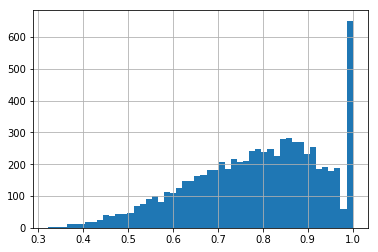

In [244]:
df_5.dist.hist(bins=50)

In [245]:
df = read_data().pipe(fill_na)

In [246]:
df.head()

,BRAND,CONTENTS,DALTIX_ID,DESCRIPTION,DISPLAY_URL,NAME,PRODUCT_ID,SHOP,SPECIFICATIONS
0,kärcher,[],43823f3f6826dcfd1f14b5898d742a1ead54937001f980...,De velgenreiniger 'Car & Bike' van Kärcher is ...,https://www.plan-it.be/nl/tuin-buitenleven/aut...,"Kärcher velgenreiniger 'Car & Bike' 0,5 L",5305104,planit,"{'Inhoud': '""500.0 ml""', 'Toepassing': '""Reini..."
1,levis,[],2258f16fa7ff7aab35c4534ac645017637d072f2fee9cc...,De matte muurverf Originals potloodgrijs van L...,https://www.bol.com/nl/p/muurverf-originals-ma...,"Muurverf Originals mat 2,5l potloodgrijs",9200000095428359,bol,None
2,rapid,[],69ec8d4f776200897422a4b8f93d3416a36781fe110d75...,Vlakdraad nieten. Oorspronkelijk ontworpen voo...,https://www.bol.com/nl/p/rapid-nieten-no-970-8...,Rapid Nieten - No 970 - 8 mm,9200000010411327,bol,None
3,differnz,[],f03ef881a1d1934c62b9db6b4403a59ae34de96148f362...,Toiletmeubel Fabulous 40 is een van de meest v...,https://www.bol.com/nl/p/differnz-fabulous-fon...,Differnz Fabulous Fonteinmeubel - 40 cm - Wit,9200000051330319,bol,None
4,pickup,[],aaff0aa6db24814ad25d5cb410ded08361ab32bcb953e1...,"Pickup pictogram is zelfklevend, weerbestendig...",https://www.plan-it.be/nl/verf-laminaat-decora...,"Pickup pictogram P621 ""Heren""",1409779,planit,"{'Formaat': '""10 x 10cm""', 'Gebruik': '""Voor b..."


In [249]:
df.SPECIFICATIONS.sample(20)

9862      {'Aantal lagen': '"1 laag"', 'Afwerking': '"Ma...
84752     {'Artikeltype': '"Greep"', 'Diameter': '"20 mm...
84366     {'Aantal stuks': '"1"', 'Garantie': '"2 jaar"'...
95815     {'Artikeltype': '"Wandslangenhaspel"', 'Automa...
47952     {'Afwerking': '"Gelamineerd"', 'Breedte': '"35...
47448     {'Afwerking': '"Geplastificeerd"', 'Breedte': ...
40215                                                  None
96532                                                  None
100357                                                 None
82389     {'Algemene kenmerken': '{
  "Merk" : [
    "Pr...
43921                                                  None
76378     {'Diameter': '"100 mm"', 'Kleur': '"Aluminium"...
87533                                                  None
23135     {'Breedte': '"102 cm"', 'Garantie': '"20 jaar ...
91165     {'Algemene kenmerken': '{
  "Merk" : [
    "Ub...
72592                                                  None
66177                                   

In [252]:
df_5[df_5.dist > 0.7]

,id_1,id_2,dist,daltix_id_1,daltix_id_2,brand_id_1,brand_id_2,name_id_1,name_id_2,store_id_1,store_id_2
1,1,21690,0.961159,2258f16fa7ff7aab35c4534ac645017637d072f2fee9cc...,5a6ca9f873465c48a2dd67323c4980f5481f5e300d166d...,levis,levis,"Muurverf Originals mat 2,5l potloodgrijs","Levis Muurverf Originals mat 2,5l potloodgrijs",bol,hubo
2,2,12582,0.843365,c94e4ac248e0075076dda8ea417be7b770dd91a58abe4b...,161afaf5732423c54d2977e34f901aeff65c871b2bfe9b...,commandant,commandant,Commandant Rubbing Compound nr. 3 - 500gr.,Commandant onderhoud nr 3 rubbing compound,bol,praxis
8,8,1611,0.751907,13b9e6d4e5fc32bd8f21da4aa79184fcfada46cbbf0ad5...,6de25b17b4f0829a24e87f3f3fb28d7c9d888446147085...,bosch,bosch,Bosch AHS 70-34 elektrische heggenschaar 700W ...,BOSCH Heggenschaar AHS 70-34,hubo,hornbach
19,19,26319,1.000000,d498db37f6a475efe9b83a84d8302a1082cdf5dec6482a...,b2874501a25de791d0b6d62856614ae76aa67265382c29...,eurom,eurom,EUROM Terrasverwarmer TH1800S,Eurom terrasverwarmer th1800s,hornbach,praxis
46,46,41447,0.771179,b947ac931180510a09cce2eeae73544bab35208d39b986...,6af92cbe4f77a4922b2008ed959ab7473b83c4159b2a9f...,brabantia,brabantia,Brabantia vuilniszak 50 L 10 stuks,Brabantia vuilniszak 15 L - 20 stuks,praxis,planit
49,49,40213,0.807126,9c667b5732967d55ee159649187ab8461b3dcd69d75f77...,754a38c10ffddbfd155e6110d24d404f41569c271a8871...,stanley,stanley,Stanley reservemesjes lang 5 stuks,Stanley Reservemesjes 5 stuks,praxis,hubo
61,61,15242,0.798784,370c08e9753cf8b1907c66f28e84f1d377c550ce59e172...,9700ee329372bc67e0015f0c5a347d261651ae01fbae7f...,aquaplan,aquaplan,Aquaplan Zelfklevend lood 20x300 cm,Atab Zelfklevend Lood 20 cm x 3 m,hubo,planit
76,76,15939,0.915281,3903902419876f0c559215646ce03621002cf20555dc72...,a47faa31d9bff9cb191e8a5c4bc2a70815f60d7901fb08...,levis,levis,Levis lak 'Expert' kanariegeel hoogglans 1L,Levis Lak Expert buiten hoogglans 1l kanariegeel,planit,hubo
92,92,35620,1.000000,85012d37e26310610a0b7667d2246bc02926fe450a08f1...,714c253e3524713bb2b496937f872daa3596489ded88ea...,niko,niko,NIKO Rolluikschakelaar Intense Sterling,Niko Rolluikschakelaar Intense sterling,planit,hubo
96,96,42644,0.841881,b8cd8434409412b33a7e6aa483337c300385dd8e1aadb9...,2b3ec3df0e7affaf9ae2e37313aaf0e456cd7b0bdfa6af...,fischer,fischer,Fischer Injectiemortel 100ml,Fischer injectiemortel vs300t,hubo,praxis


In [280]:
len(pairs)

27213

In [343]:
fd = pd.read_csv('name_dist_0_7.csv')

In [344]:
fd.sample(10)

,id_1,id_2,dist,daltix_id_1,daltix_id_2,brand_id_1,brand_id_2,name_id_1,name_id_2,store_id_1,store_id_2
1929,16953,4179,0.885250,57f72c7e9fcd7546d286f1a1fe6f70928b48554f7a50a4...,443e9bace3ba3c09a41139e3adab0cfe6fc59716fd7b97...,hg,hg,HG verf kracht afbijter 750ml,HG verf kracht afbijter 750 ml,praxis,hornbach
2802,24807,2196,0.705335,70966f257437b47b0de83f66d206ee2c61672a0f1208e1...,e4175fbf14b488fb7aa9126dd07cae5e35521e10ae3195...,gaaspaneel,gaaspaneel,Gaaspaneel 90 x 180cm,Gaaspaneel 90 x 180 cm,praxis,hornbach
4546,40899,14993,0.777326,0b86c279ec68870ee99b0ce5fe799266cd5df317fbdeae...,af03f4f3e0e5cdc23cdcf4b54db58f1623e30e8294bfd2...,carpoint,carpoint,Carpoint Schroefkogel 50mm M22,"Carpoint Schroefkogel 50 Mm (m22 X 2,5 Mm)",hubo,bol
2073,18289,43078,1.000000,64550143addd232ce5273aeb15ca6f5b68b52ed27a4233...,8396c2c9ed6379ee6bb70ae220570ac68709021acfaa9d...,hg,hg,HG Behangverwijderaar - 500 ml,HG behangverwijderaar 500 ml,bol,hornbach
470,4101,1009,0.893940,a4a56d04f228e96901af7f963c47ef1b27cf2a8944a041...,8bf23ee58f5968084bd644e692e56429dae2def8ec24d5...,grohe,grohe,GROHE Wastafelkraan Feel met hoge uitloop chro...,GROHE Feel Wastafelkraan - Hoge uitloop - Chroom,hornbach,bol
4412,39706,12916,1.000000,ab19627de6ef24128036087bf562771b9b776a4bc3865a...,b3105924be014c3f16c53155b909057b7cfb4914117719...,bosch,bosch,Bosch Hoekmeter PAM 220,BOSCH Hoekmeter PAM 220,praxis,hornbach
3573,31817,23389,0.701405,b4bf3a71bd160a31107eaf51977ba5034b58526328aa26...,29ea6fa5729a6e74711445323f3111a68e4f53658dfbaf...,bosch,bosch,Bosch Quigo Plus kruislijnlaser + statief,Bosch Quigo Kruislijnlaser - Zelfnivellerend -...,hubo,bol
2651,23458,12151,0.777881,04abbc14e66fc461c2246eb7f90d307a8a24ae98adfdd1...,499dc7f2968b75db7e8eb077c49d3402563d5bcbaf8185...,bosch,bosch,Bosch hm-riff delta zaagblad 78mm,BOSCH HM-RIFF delta zaagblad 78 mm,praxis,hornbach
3393,30082,20939,0.874740,83fcc9e51a2e5c47108ed7940ec82f6d0c4d7c55560454...,1ba07b5c4e281cfaf5f33f9e59a04202798d6bcb6f0aca...,legrand,legrand,Legrand Variabele buitenhoek DLP 35mm,LEGRAND DLP variabele buitenhoek,hubo,planit
1061,9689,17045,0.806112,dd7e0a5b0f0fdfeef2e7eede865dd24e19286a31672a58...,fb82861101962b81b87dea3fa6108d5c3c865b04c5189f...,carpoint,carpoint,Carpoint Ijskrabber Rood/zwart 23 Cm,Carpoint ijskrabber zwart,bol,hubo


In [348]:
fd['digits_id_1'] = fd.name_id_1.apply(func)
fd['digits_id_2'] = fd.name_id_2.apply(func)

In [349]:
tokenizer = RegexpTokenizer('\d+')
def func(x):
    try:
        return set(tokenizer.tokenize(x))
    except:
        return None

In [346]:
fd = fd[(fd.digits_id_1 == fd.digits_id_2) | (len(fd.digits_id_1) == 0) | (len(fd.digits_id_2) == 0)]

In [356]:
fd.sample(10)

,id_1,id_2,dist,daltix_id_1,daltix_id_2,brand_id_1,brand_id_2,name_id_1,name_id_2,store_id_1,store_id_2,digits_id_1,digits_id_2
3232,28472,19815,0.888241,15988fc2bbe2a8fa7720e401a23bd3334962a54f3a02e4...,7a0f3e728580a9cd4a1116ad0fa0eb0f140329466ec2a9...,bosch,bosch,Bosch Veiligheidsbril kunststof,Bosch veiligheidsbril,hubo,planit,{},{}
468,4085,44492,0.895976,9b4eaaf7bdab0da0b6f4704f7b68390babfb84acb44460...,866eee55392156db98eda8cae2fe3a56a3e33f989bebca...,polyfilla,polyfilla,Polyfilla Kneedbaar hout 75 gr meranti,Polyfilla pasta kneedbaar hout meranti 75 gr,hubo,planit,{75},{75}
3754,33559,33426,0.927597,e4a1e8432109614912842c79f994a9d4310e8fc4a68edd...,f43d5b1b1a963c51add7192b684bc08d55625aee901949...,sikkens,sikkens,"Cetol HLS plus 2,5l lichte eik","Sikkens Cetol HLS plus 2,5l lichte eik",bol,hubo,"{2, 5}","{2, 5}"
4902,44254,12416,0.737448,60467478754cc570a9afcd9a97a7fae6aec3b469c01e21...,52f846245c89c8465476439e4074823e33914e7ccecb4d...,grohe,grohe,GROHE Wastafelkraan Get chroom,GROHE Get Wastafelkraan - Met waste,hornbach,bol,{},{}
1889,16657,27498,0.942881,d539e6a07986d3d3a3c44402ae8ab3afbfb37925320cb7...,fc25eb9c63bf4b42a5c9031aabfec49a869fdf0cec0da3...,xyladecor,xyladecor,Xyladecor Houtbeits tuinhuis Color 1l olijfboom,Xyladecor houtbeits 'Color' olijfboom 1L,hubo,planit,{1},{1}
3359,29778,9361,0.827975,0a25962aa542475750289fb70feaa9fb0c1d0f4c2ce6c0...,42b785e29742f767063219b8629b4f709f090414640bc9...,zandbak,zandbak,Zandbak Jade gekleurd met opbergvak,Zandbak Jade,hubo,praxis,{},{}
1343,12099,42811,1.000000,6078169b14b5c8bd4717d99e2a6e90ce6bfc3631e6b5d0...,e71b65bb0f0f98c319a0e4bef8c9fdca144ceb700c5448...,gre,gre,GRE Bodemstofzuiger borstel budget,Gre bodemstofzuiger borstel budget,hornbach,praxis,{},{}
4586,41219,2435,0.971226,3562a469034140feb29669488ff7eb10bda0c030b96aca...,88bd440f75b9ea93dffd472093c8fcd4abd011a6a3722f...,legrand,legrand,LEGRAND Oteo wisselschakelaar wit,Legrand Wisselschakelaar Oteo,planit,hubo,{},{}
4384,39462,35114,0.841463,39c2721073b86882aac61854cfb9db7f076aee1943a451...,4bea6cd8ad01ff50356e2ddd668a8e2d3a167a7b7fc9eb...,aquaplan,aquaplan,Aquaplan hechtvernis roofprimer 4 L,Aquaplan Roofprimer 4l,planit,hubo,{4},{4}
4229,38037,12904,0.963238,e776bb592865088929b22f332dc3209963adbbe3379096...,762f554e9b839fb62b541c81f614fa2c2f8a083a359611...,v33,v33,V33 houtbeits 'Deuren & ramen High Protection'...,V33 Houtbeits ramen & deuren high protection 2...,planit,hubo,"{2, 33, 5}","{2, 33, 5}"


In [341]:
df = pd.concat([pairs,fd[['daltix_id_1','daltix_id_2']]])

In [342]:
df.to_csv('submission_compare_numbers_2.csv',index=False)

In [405]:
df_5[['name_id_1','name_id_2','dist']].sample()

,name_id_1,name_id_2,dist
28722,Ecopots Rotterdam bloembak vierkant 50cm taps ...,Ecopots Rotterdam bloembak vierkant 30cm taps ...,0.877699


In [406]:
df

,BRAND,DALTIX_ID,DESCRIPTION,NAME,PRODUCT_ID,SHOP
0,kärcher,43823f3f6826dcfd1f14b5898d742a1ead54937001f980...,De velgenreiniger 'Car & Bike' van Kärcher is ...,"Kärcher velgenreiniger 'Car & Bike' 0,5 L",5305104,planit
1,levis,2258f16fa7ff7aab35c4534ac645017637d072f2fee9cc...,De matte muurverf Originals potloodgrijs van L...,"Muurverf Originals mat 2,5l potloodgrijs",9200000095428359,bol
5,commandant,c94e4ac248e0075076dda8ea417be7b770dd91a58abe4b...,Commandant 3 is een zeer krachtige polijstpast...,Commandant Rubbing Compound nr. 3 - 500gr.,9200000018857426,bol
8,barbecook,611981068f621f67d0abf0fafac76f3975ec2a05207fad...,De barbecue 'Adam 50 Top' van Barbecook is een...,Barbecook barbecue ‘Adam 50 Top’ Ø 50cm,5635109,planit
11,bosch,513a49566d496eb0547c413314437844687177d68e5190...,De elektrische heggenschaar AHS 60-16 van Bosc...,Bosch AHS 60-16 elektrische heggenschaar 450W ...,336877,hubo
13,schommelhaak,ad9b0def316ca8b62f3cbd2251d69b220ab27b809d282f...,Schommelhaak rond geel verzinkt met een diamet...,Schommelhaak rond geel verzinkt 10cm,5358563,praxis
14,legrand,2474e40fb5da15ce91790bd8da6960446a1442e6cbd1ad...,Dit dubbel stopcontact RJ45 6 UTP heeft een wi...,Legrand Stopcontact dubbel RJ45 6 UTP met span...,791587,hubo
16,niko,970e61bb8da4c2bf6a1a77e83f18ae6195e293f9cf3a9c...,NIKO Sokkel Universele draaiknopdimmer 325W,Niko sokkel Universele draaiknopdimmer 325 W,5310051,planit
17,bosch,13b9e6d4e5fc32bd8f21da4aa79184fcfada46cbbf0ad5...,De elektrische heggenschaar AHS 70-34 van Bosc...,Bosch AHS 70-34 elektrische heggenschaar 700W ...,370658,hubo
18,bison,d434be685cd34d9443638a4c3824783708a4130b7c71ba...,Bison Hard PVC lijm\nBison Hard PVC lijm is ge...,BISON Hard pvc gel 250 ml,4182423,hornbach


In [425]:
df.sample().SPECIFICATIONS['kleur']

KeyError: 'kleur'